# 3a)

- Klassifikationsfehlerwahrscheinlichkeit = 0 (man erhält für k=1 immer die richtige Klasse, da der nearest neighbor immer der geprüfte Vektor aus X ist)
- Nein. Im Gegenteil kann es zu Problemen führen, wenn man die gesamte, zur Verfügung stehende Datenmenge zum Lernen nutzt weil sich das Modell zu sehr an die Daten anpasst und für neue Datenvektoren dann sehr falsche Prognosen liefert (Overfitting)
- Man kann einen Teil der Daten für die Validierung zurückhalten und mit diesem Teil dann das Modell testen. So kann man dann den Generalisierungsfehler schätzen.
- Kreuzvalidierung: Wenn man einen Teil der Daten für die Validierung zurückhält, hat man natürlich weniger Daten zum Trainieren, was wiederum auch nicht erstrebenswert ist. Die Kreuzvalidierung ist eine Lösung dieses Dilemmas (Daten zum Validieren zurückhalten vs. Daten zum Training nutzen). Der Datensatz wird zunächst in S Teile aufgeteilt, das System wird S mal trainiert und dabei immer ein anderer Teil für die Validierung zurückgehalten sodass im Endeffekt alle Daten zum Training aber auch alle Daten zum Testen genutzt wurden. Den (Gesamt)-Generalisierungsfehler erhält man dann durch das Mitteln der S Durchläufe. Nachteil ist, dass man mehr Trainings-Durchläufe benötigt -> je nach Modell und Anzahl der Parameter dauert das Training sehr lange. 

# 3b)

- S=Anzahl der Sub-Sets in der Kreuz-Validierung, im Beispiel S=10 bedeutet Datenmenge wird in 10 Teile geteilt, und 10x trainiert (jeweils 9 Teile zum Training und 1 Teil zum Test)
- perm=zufällige Permutation der Indexe der Daten-Vektoren und der zugehörigen Klassenlabels, diese zufällige Permutation wird genutzt um das Datenset zufällig neu zu ordnen. Das so erzeugte Datensetz aus Daten-Vektoren und entsprechendem Klassenlabel wird in Xp und Tp gespeichert.
- idxS=enthält die Indexe der entsprechenden Sub-Sets (z.B. bei 4 Daten-Vektoren und S=2 enthält idxS range(0,2) und range(2,4), d.h. die Indexe [0] und [1] gehören zum ersten Subset und die Indexe [2] und [3] zum zweiten Subset).
- Die Schleife "for idxTest in idxS" iteriert über die entsprechenden Subsets. Die Indexe in idxTest werden im jeweiligen Durchlauf nicht zum Training genutzt sondern zum Testen. D.h. in der for-Schleife werden die entsprechenden S Trainings-Durchläufe durchgeführt.
- X_learn=Trainings-Daten sowie zugehörige Klassenlabels T_learn. X_test=Validierungs-Daten sowie zugehörige Klassenlabels T_test.
- Für S=1 wird das gesamte Datenset sowohl zum Lernen als auch zum Testen/Validieren genutzt.
- In der inneren Schleife "for i in range(len(X_test))" erfolgt dann die Klassifikation der Test-Daten mit der Methode Predict. Anschließend wird die Anzahl des Auftretens der Klassen-Labels im Test-Datenset gezählt/ermittelt (in Numpy Array nC). Außerdem werden die Werte der Verwechslungsmatrix (in pConfErrors) und falls die Klassifikation fehlerhaft ist auch die Anzahl der confusion errors (in Variable pClassError) hochgezählt.
- Sobald die innere und die äußere Schleife vollständig durchlaufen wurde, wird dann die eigentliche Wahrscheinlichkeit für einen Klassifikationsfehler (pClassError) berechnet (d.h. die Anzahl der fehlerhaften Klassifikationen wird durch N geteilt) und in zwei verschachtelten for-Schleifen dann die eigentlichen Wahrscheinlichkeiten der Verwechslungsmatrix berechnet indem die Anzahl in pConfErrors noch durch die Häufigkeit der richtigen Klasse geteilt wird. Wenn man z.B. 5 Daten-Vektoren die eigentlich zur Klasse [1] gehören fälschlicherweise der Klasse [0] zuordnet und die Klasse [0] insgesamt 50 mal im Test-Set vorkommt, ist der pConfError[0][1]=5/50 = 10% 

# 3c)

- Um die Klassen aus Aufgabe 2 zu importieren
- mit np.random.multivariate_normal(mu,sigma,N), es werden N=N1+N2=1000 Datenpunkte generiert, 500 gehören zur Klasse 0 und 500 zur Klasse 1
- Die beiden Klassen sind Gauß-verteilt. Die Klasse 0 hat dabei den Mittelwert [1,1] und die Klasse 1 hat den Mittelwert [3,1], d.h. diese Punkte sind die Punkte mit der höchsten Wahrscheinlichkeit. Die Kovarianzmatritzen sind [1,0.5],[0.5,1] (Klasse 0) sowie [1,0.5],[0.5,1]
- pE_naive ist der ist die Fehlerwahrscheinlichkeit und pCE_naive ist die Verwechslungsmatrix (Wahrscheinlichkeiten) wenn man mit dem naiven KNN Klassifikator eine Kreuzvalidierung durchführt.


Data size: N= 1000 , D= 2

Naive KNN Classifier: 
------------------------
S= 10  fold Cross-Validation of naive  5 -NN-Classifier requires  4.3125  seconds. Confusion error probability matrix is 
 [[0.88  0.132]
 [0.12  0.868]]
Probability of a classification error is pE =  0.126
New data vector x_test= [2 1]  is most likely from class  0 ; class probabilities are p_class =  [0.8, 0.2]
New data vector x_test= [5 1]  is most likely from class  1 ; class probabilities are p_class =  [0.0, 1.0]
New data vector x_test= [-1  1]  is most likely from class  0 ; class probabilities are p_class =  [1.0, 0.0]

Fast KNN Classifier based on KD-Trees: 
---------------------------------------
S= 10  fold Cross-Validation of fast  5 -NN-Classifier requires  0.25  seconds. Confusion error probability matrix is 
 [[0.876 0.13 ]
 [0.124 0.87 ]]
Probability of a classification error is pE =  0.127
New data vector x_test= [2 1]  is most likely from class  0 ; class probabilities are p_class =  [0.8, 0.2]

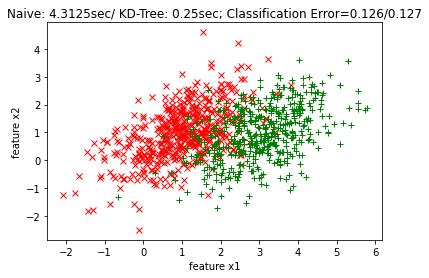

In [6]:
#!/usr/bin/env python
# Programmgeruest zu Versuch 1, Aufgabe 3
import numpy as np
import scipy.spatial
from random import randint
import matplotlib 
import matplotlib.pyplot as plt 
from time import process_time
from v1a2 import * #created v1a2.py from v1a2.ipynb - v1a2.py has no main-fct as we got errors when importing including main

# (i) create some synthetic data (2-dimensional Gaussian)
C=2                               # two classes
N1,N2=500,500                    # N1 and N2 data vectors for the two classes
mu1, mu2 = [1,1], [3,1]           # expectations for the two classes
sigma1 = [[1,0.5],\
          [0.5,1]]                # covariance matrix for class 1
sigma2 = [[1,0.5],\
          [0.5,1]]                # covariance matrix for class 2
X1 = np.random.multivariate_normal(mu1,sigma1,(N1))    # Gaussian data vectors for class 1
X2 = np.random.multivariate_normal(mu2,sigma2,(N2))    # Gaussian data vectors for class 2
T1,T2 = N1*[0],N2*[1]             # corresponding class labels 
X = np.concatenate((X1,X2))       # entire data set
T = np.concatenate((T1,T2))       # entire label set
N,D = X.shape[0], X.shape[1]      # size of data set
print("Data size: N=",N,", D=",D)

# (ii) create and test classifiers
k,S = 5,10                        # k=number of nearest neighbors; S=number of data subsets for cross validation
X_test = np.array([[2,1],[5,1],[-1,1]])   # Some additional data vectors to be tested 

# (ii.a) test of naive KNN classifier
print("\nNaive KNN Classifier:","\n------------------------")
knnc = KNNClassifier(C,k)         # create classifier object of class KNNClassifier
t1=process_time()                        # start time     
pE_naive,pCE_naive = knnc.crossvalidate(S,X,T) # do S-fold cross validation for data X,T
t2=process_time()                        # end time
t_naive=t2-t1                     # wall time required by the naive KNN algorithmus (in seconds)
print("S=", S, " fold Cross-Validation of naive ", k, "-NN-Classifier requires ", t_naive, " seconds. Confusion error probability matrix is \n", pCE_naive)
print("Probability of a classification error is pE = ", pE_naive)
knnc.fit(X,T)                     # train classifier with whole data set
for x_test in X_test:             # Test some additional data vectors x_test from X_test         
    t_test,p_class,idxNN = knnc.predict(x_test,k)
    print("New data vector x_test=", x_test, " is most likely from class ", t_test, "; class probabilities are p_class = ", p_class)

# (ii.b) test of KD-tree KNN classifier
print("\nFast KNN Classifier based on KD-Trees:","\n---------------------------------------")
fknnc=FastKNNClassifier(C,k)
ft1=process_time()
pE_fknnc,pCE_fknnc=fknnc.crossvalidate(S,X,T)
ft2=process_time()
t_fknnc=ft2-ft1
print("S=", S, " fold Cross-Validation of fast ", k, "-NN-Classifier requires ", t_fknnc, " seconds. Confusion error probability matrix is \n", pCE_fknnc)
print("Probability of a classification error is pE = ", pE_fknnc)
fknnc.fit(X,T)
for x_test in X_test:
    t_test,p_class,idxNN=fknnc.predict(x_test,k)
    print("New data vector x_test=", x_test, " is most likely from class ", t_test, "; class probabilities are p_class = ", p_class)

# (iii) plot data
f=plt.figure()
a = f.add_subplot(111)
a.plot(X1.T[0],X1.T[1],'rx')               # plot data vectors of class 1
a.plot(X2.T[0],X2.T[1],'g+')               # plot data vectors of class 2
a.set_xlabel('feature x1');
a.set_ylabel('feature x2');
a.set_title('Naive: '+str(t_naive)+'sec/ KD-Tree: '+str(t_fknnc)+'sec; Classification Error='+str(pE_naive)+'/'+str(pE_fknnc));

plt.show()


# 3d)

In [31]:
# (ii) create and test classifiers
k,S = 511,1                   # k=number of nearest neighbors; S=number of data subsets for cross validation
X_test = np.array([[2,1],[5,1],[-1,1]])   # Some additional data vectors to be tested 

# (ii.a) test of naive KNN classifier
print("\nNaive KNN Classifier:","\n------------------------")
knnc = KNNClassifier(C,k)         # create classifier object of class KNNClassifier
t1=process_time()                        # start time     
pE_naive,pCE_naive = knnc.crossvalidate(S,X,T) # do S-fold cross validation for data X,T
t2=process_time()                        # end time
t_naive=t2-t1                     # wall time required by the naive KNN algorithmus (in seconds)
print("S=", S, " fold Cross-Validation of naive ", k, "-NN-Classifier requires ", t_naive, " seconds. Confusion error probability matrix is \n", pCE_naive)
print("Probability of a classification error is pE = ", pE_naive)
knnc.fit(X,T)                     # train classifier with whole data set
for x_test in X_test:             # Test some additional data vectors x_test from X_test         
    t_test,p_class,idxNN = knnc.predict(x_test,k)
    print("New data vector x_test=", x_test, " is most likely from class ", t_test, "; class probabilities are p_class = ", p_class)

# (ii.b) test of KD-tree KNN classifier
print("\nFast KNN Classifier based on KD-Trees:","\n---------------------------------------")
fknnc=FastKNNClassifier(C,k)
ft1=process_time()
pE_fknnc,pCE_fknnc=fknnc.crossvalidate(S,X,T)
ft2=process_time()
t_fknnc=ft2-ft1
print("S=", S, " fold Cross-Validation of fast ", k, "-NN-Classifier requires ", t_fknnc, " seconds. Confusion error probability matrix is \n", pCE_fknnc)
print("Probability of a classification error is pE = ", pE_fknnc)
fknnc.fit(X,T)
for x_test in X_test:
    t_test,p_class,idxNN=fknnc.predict(x_test,k)
    print("New data vector x_test=", x_test, " is most likely from class ", t_test, "; class probabilities are p_class = ", p_class)


Naive KNN Classifier: 
------------------------
S= 1  fold Cross-Validation of naive  511 -NN-Classifier requires  3.734375  seconds. Confusion error probability matrix is 
 [[0.89  0.152]
 [0.11  0.848]]
Probability of a classification error is pE =  0.131
New data vector x_test= [2 1]  is most likely from class  0 ; class probabilities are p_class =  [0.5225048923679061, 0.4774951076320939]
New data vector x_test= [5 1]  is most likely from class  1 ; class probabilities are p_class =  [0.15459882583170254, 0.8454011741682974]
New data vector x_test= [-1  1]  is most likely from class  0 ; class probabilities are p_class =  [0.837573385518591, 0.162426614481409]

Fast KNN Classifier based on KD-Trees: 
---------------------------------------
S= 1  fold Cross-Validation of fast  511 -NN-Classifier requires  2.78125  seconds. Confusion error probability matrix is 
 [[0.89  0.152]
 [0.11  0.848]]
Probability of a classification error is pE =  0.131
New data vector x_test= [2 1]  is mos

Ergebnisse siehe auch Tabelle 3d.xlsx (keine Ahnung ob das mit dem Screenshot funktioniert)

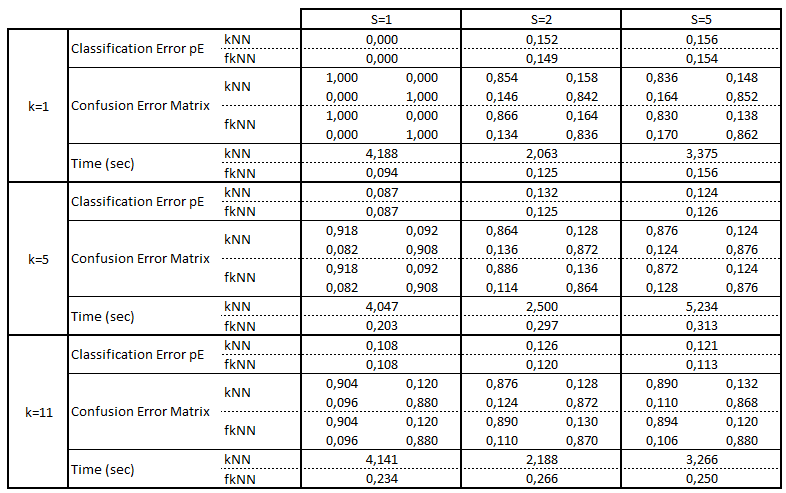

Nein, die Ergebnisse sind nicht immer gleich (siehe Tabelle).



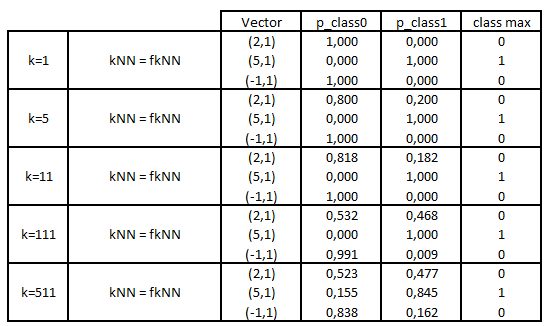